In [1]:
import villas.dataprocessing.readtools as rt
import villas.dataprocessing.plottools as pt
from villas.dataprocessing.timeseries import TimeSeries as ts
from math import sqrt

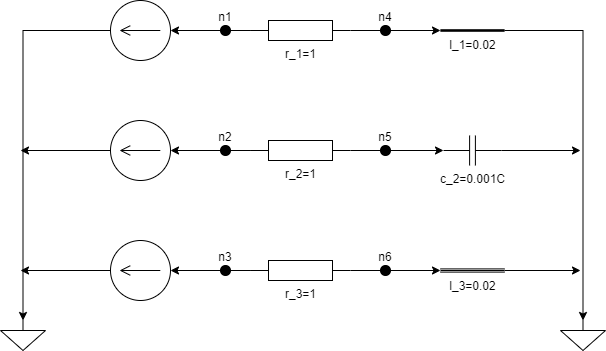

In [2]:
# DPsim EMT simulation
import dpsimpy

name = 'test_2'

# Nodes
gnd = dpsimpy.emt.SimNode.gnd
n_1 = dpsimpy.emt.SimNode('n_1')
n_2 = dpsimpy.emt.SimNode('n_2')
n_3 = dpsimpy.emt.SimNode('n_3')
n_4 = dpsimpy.emt.SimNode('n_4')
n_5 = dpsimpy.emt.SimNode('n_5')
n_6 = dpsimpy.emt.SimNode('n_5')

# 3 phase voltage source
vs_1 = dpsimpy.emt.ph1.VoltageSource('vs_1')
vs_1.set_parameters(V_ref=complex(50,0),f_src=50)
vs_2 = dpsimpy.emt.ph1.VoltageSource('vs_2')
vs_2.set_parameters(V_ref=complex(-25,25*sqrt(3)),f_src=50)
vs_3 = dpsimpy.emt.ph1.VoltageSource('vs_3')
vs_3.set_parameters(V_ref=complex(-25,-25*sqrt(3)),f_src=50)

# components
r_1 = dpsimpy.emt.ph1.Resistor('r_1')
r_1.set_parameters(R=1)
l_1 = dpsimpy.emt.ph1.Inductor('l_1')
l_1.set_parameters(L=0.02)

r_2 = dpsimpy.emt.ph1.Resistor('r_2')
r_2.set_parameters(R=1)
c_2 = dpsimpy.emt.ph1.Capacitor('c_2')
c_2.set_parameters(C=0.001)

r_3 = dpsimpy.emt.ph1.Resistor('r_3')
r_3.set_parameters(R=1)
l_3 = dpsimpy.emt.ph1.Inductor('l_3')
l_3.set_parameters(L=0.02)

# connection
vs_1.connect([gnd,n_1])
vs_2.connect([gnd,n_2])
vs_3.connect([gnd,n_3])
r_1.connect([n_1,n_4])
r_2.connect([n_2,n_5])
r_3.connect([n_3,n_6])
l_1.connect([n_4,gnd])
c_2.connect([n_5,gnd])
l_3.connect([n_6,gnd])

# Define system topology
system = dpsimpy.SystemTopology(50, [gnd, n_1, n_2, n_3, n_4, n_5, n_6], [vs_1, vs_2, vs_3, r_1, r_2, r_3, l_1, c_2, l_3])

# Logging
logger = dpsimpy.Logger(name)
logger.log_attribute('n_1.v', 'v', n_1)
logger.log_attribute('n_2.v', 'v', n_2)
logger.log_attribute('n_3.v', 'v', n_3)
logger.log_attribute('n_4.v', 'v', n_4)
logger.log_attribute('n_5.v', 'v', n_5)
logger.log_attribute('n_6.v', 'v', n_6)


logger.log_attribute('r_1.i_intf', 'i_intf', r_1)
logger.log_attribute('r_2.i_intf', 'i_intf', r_2)
logger.log_attribute('r_3.i_intf', 'i_intf', r_3)



sim = dpsimpy.Simulation(name)
sim.set_system(system)
sim.set_domain(dpsimpy.Domain.EMT)
sim.set_time_step(0.0001)
sim.set_final_time(0.1)
sim.add_logger(logger)

sim.run()


[16:46:55.723190 MnaSolverFactory info] creating EigenDense solver implementation
[16:46:55.723706 MnaSolverFactory info] creating EigenDense solver implementation
[16:46:55.724061 MnaSolverFactory info] creating EigenDense solver implementation


In [3]:
# read EMT results
work_dir = 'logs/'
log_name = 'test_2'
print(work_dir + log_name + '.csv')

ts_dpsim_emt = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

logs/test_2.csv
column number: 9
results length: 1000
real column names: ['n_1.v', 'n_2.v', 'n_3.v', 'n_4.v', 'n_5.v', 'n_6.v', 'r_1.i_intf', 'r_2.i_intf', 'r_3.i_intf']
complex column names: []


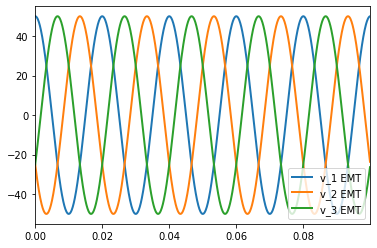

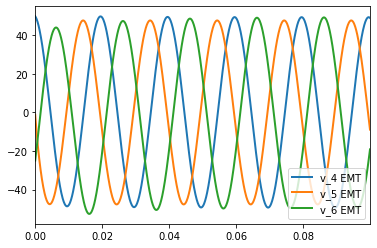

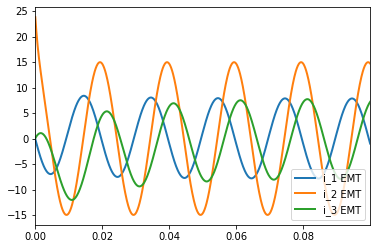

In [4]:
v_1 = 'n_1.v'
v_2 = 'n_2.v'
v_3 = 'n_3.v'
v_4 = 'n_4.v'
v_5 = 'n_5.v'
v_6 = 'n_6.v'
i_1 = 'r_1.i_intf'
i_2 = 'r_2.i_intf'
i_3 = 'r_3.i_intf'


pt.set_timeseries_labels(ts_dpsim_emt[v_1], 'v_1 EMT')
pt.set_timeseries_labels(ts_dpsim_emt[v_2], 'v_2 EMT')
pt.set_timeseries_labels(ts_dpsim_emt[v_3], 'v_3 EMT')
pt.set_timeseries_labels(ts_dpsim_emt[v_4], 'v_4 EMT')
pt.set_timeseries_labels(ts_dpsim_emt[v_5], 'v_5 EMT')
pt.set_timeseries_labels(ts_dpsim_emt[v_6], 'v_6 EMT')
pt.set_timeseries_labels(ts_dpsim_emt[i_1], 'i_1 EMT')
pt.set_timeseries_labels(ts_dpsim_emt[i_2], 'i_2 EMT')
pt.set_timeseries_labels(ts_dpsim_emt[i_3], 'i_3 EMT')

pt.plot_timeseries(1, ts_dpsim_emt[v_1])
pt.plot_timeseries(1, ts_dpsim_emt[v_2])
pt.plot_timeseries(1, ts_dpsim_emt[v_3])

pt.plot_timeseries(2, ts_dpsim_emt[v_4])
pt.plot_timeseries(2, ts_dpsim_emt[v_5])
pt.plot_timeseries(2, ts_dpsim_emt[v_6])


pt.plot_timeseries(3, ts_dpsim_emt[i_1])
pt.plot_timeseries(3, ts_dpsim_emt[i_2])
pt.plot_timeseries(3, ts_dpsim_emt[i_3])
